In [150]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

# 1. FFT

Read a row from the image. Collapse RGB into 1 channel. 

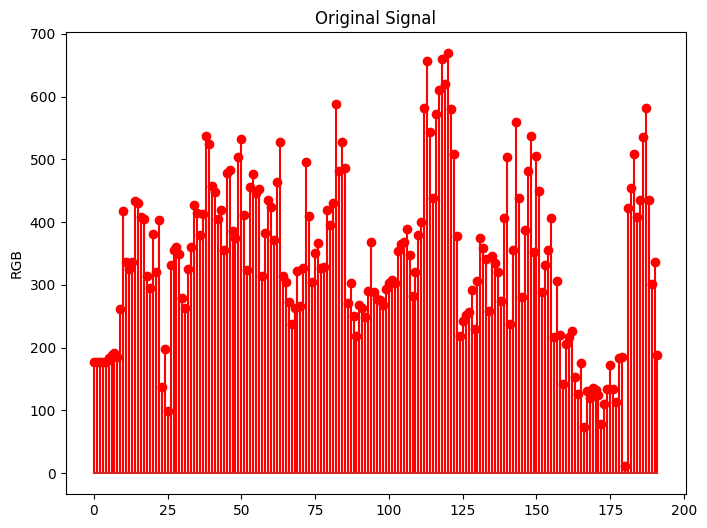

In [151]:
img = cv.imread('dogsmall.jpg')
row_pixels = img[2, :]
row_pixels
sums = np.sum(row_pixels, axis=1)
size = sums.shape[0]
# the indice are [0, 1, ..... 191]
indices = np.arange(size)

# plot the resulst
plt.figure(figsize = (8, 6))
plt.stem(indices, sums, 'r')
plt.ylabel('RGB')
plt.title('Original Signal')
plt.show()

In [152]:
# Numpy FFT and IFFT
np_dft = np.fft.fft(sums)
np_idft = np.fft.ifft(np_dft)

In [153]:
def dft(x):
    """
    Compute the Discrete Fourier Transform (DFT) of the sequence x.
    """
    N = len(x)
    X = [0] * N
    for k in range(N):
        for n in range(N):
            # X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
            X[k] += x[n] * (math.cos(-2 * math.pi * k * n / N) - 1j * math.sin(2 * math.pi * k * n / N))

    return X

dft_row_pixels = dft(row_pixels)


In [154]:
def idft(X):
    """
    Compute the Inverse Discrete Fourier Transform (IDFT) of the frequency domain sequence X.
    """
    N = len(X)
    x = [0] * N
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * cmath.exp(1j * 2 * math.pi * k * n / N)
        x[n] /= N
    return x

dft_row_pixels[2] *= 0.5

idft_row_pixels = idft(dft_row_pixels)


/Users/zee/.pyenv/versions/3.9.10/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


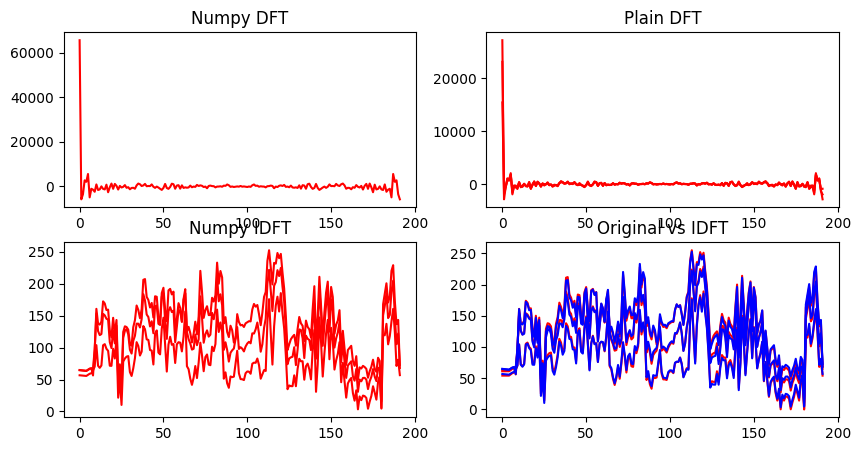

In [155]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs = axs.flatten()

axs[0].plot(indices, np_dft, 'r')
axs[0].set_title('Numpy DFT')

axs[1].plot(indices, dft_row_pixels, 'r')
axs[1].set_title('Plain DFT')

axs[2].plot(indices, np_idft, 'r')
axs[2].set_title('Numpy IDFT')

axs[3].plot(indices, idft_row_pixels, 'r')
axs[3].set_title('Plain IDFT')
plt.show()